In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the uploaded CSV file
df = pd.read_csv("waqi_city_pm25_100rows.csv")
df.head()

,Date,Country,City,Median_PM25,Lat,Long
0,2016-01-01,US,New York,97,40.7128,-74.0060
1,2016-01-02,EG,Cairo,76,30.0444,31.2357
2,2016-01-03,JP,Tokyo,25,35.6895,139.6917
3,2016-01-04,FR,Paris,87,48.8566,2.3522
4,2016-01-05,EG,Cairo,79,30.0444,31.2357


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         100 non-null    object 
 1   Country      100 non-null    object 
 2   City         100 non-null    object 
 3   Median_PM25  100 non-null    int64  
 4   Lat          100 non-null    float64
 5   Long         100 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [8]:
df.describe()

,Median_PM25,Lat,Long
count,100.000000,100.000000,100.000000
mean,59.350000,43.368388,16.640422
std,35.021025,10.322974,70.015751
min,5.000000,30.044400,-74.006000
25%,28.000000,35.689500,-16.737350
50%,63.500000,40.712800,18.068710
75%,89.000000,48.856600,31.235700
max,119.000000,59.329380,139.691700


In [ ]:
df.isna().sum()

,0
Date,0
Country,0
City,0
Median_PM25,0
Lat,0
Long,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# تحويل العمود Date إلى نوع تاريخ
df['Date'] = pd.to_datetime(df['Date'])

# -------- 1. تحليل وصفي --------
summary_stats = df['Median_PM25'].describe()
summary_stats


,Median_PM25
count,100.000000
mean,59.350000
std,35.021025
min,5.000000
25%,28.000000
50%,63.500000
75%,89.000000
max,119.000000


In [ ]:
# PM2.5 حسب الدولة
pm25_by_country = df.groupby('Country')['Median_PM25'].mean().sort_values(ascending=False)
pm25_by_country

,Median_PM25
Country,
JP,67.111111
EG,62.611111
FR,62.294118
US,55.200000
SE,52.772727


In [ ]:
# PM2.5 حسب المدينة
pm25_by_city = df.groupby('City')['Median_PM25'].mean().sort_values(ascending=False)
pm25_by_city

,Median_PM25
City,
Tokyo,67.111111
Cairo,62.611111
Paris,62.294118
New York,55.200000
Stockholm,52.772727


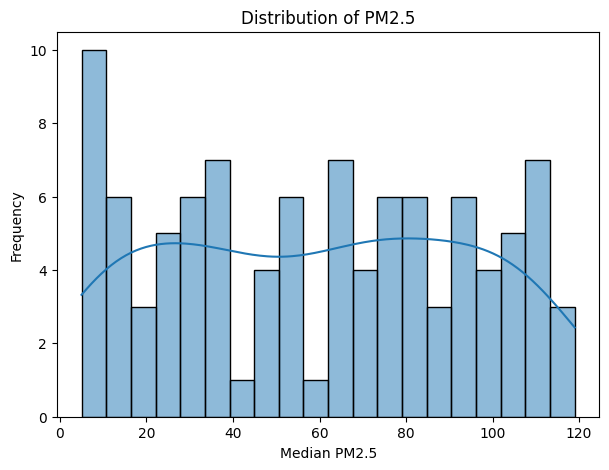

In [ ]:
# -------- 2. Visualization --------

# Histogram لتوزيع PM2.5
plt.figure(figsize=(7,5))
sns.histplot(df['Median_PM25'], bins=20, kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("Median PM2.5")
plt.ylabel("Frequency")
plt.show()


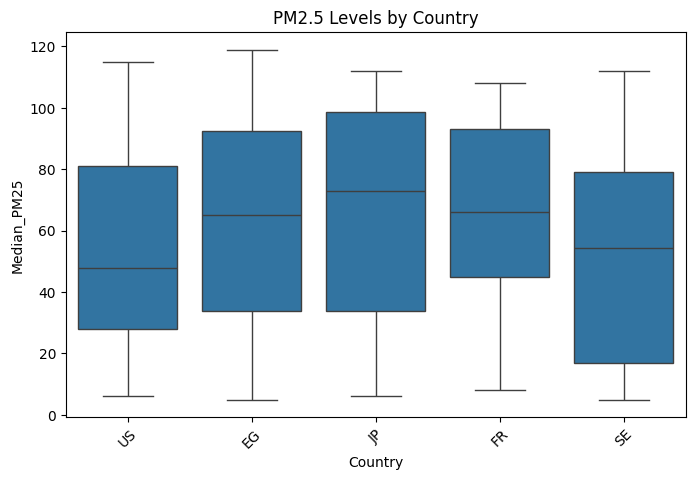

In [ ]:
# Boxplot حسب الدولة
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Country", y="Median_PM25")
plt.title("PM2.5 Levels by Country")
plt.xticks(rotation=45)
plt.show()


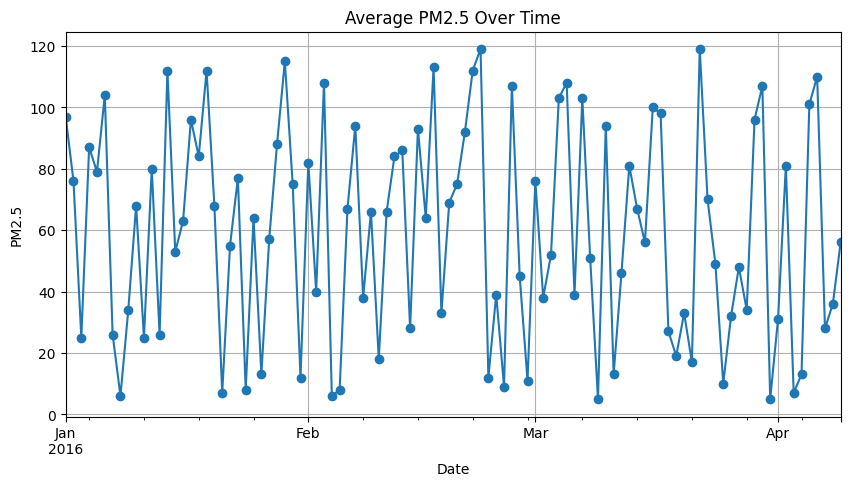

In [ ]:
# Line chart لتغير PM2.5 بمرور الوقت (متوسط يومي)
plt.figure(figsize=(10,5))
df.groupby('Date')['Median_PM25'].mean().plot(marker='o')
plt.title("Average PM2.5 Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

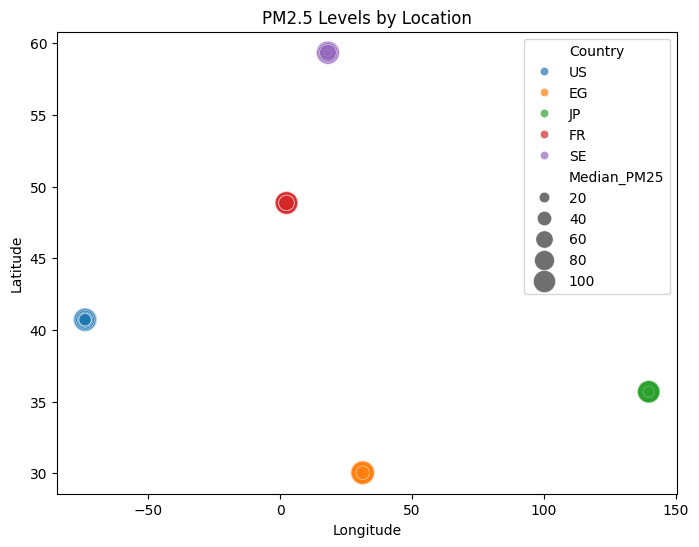

In [ ]:
# Scatter plot على الخريطة (Lat/Long)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Long", y="Lat", size="Median_PM25", hue="Country", alpha=0.7, sizes=(20, 300))
plt.title("PM2.5 Levels by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# ----------------------------
# 1. بيانات أساسية
# ----------------------------
data = {
    "City": ["Tokyo", "Cairo", "Paris", "New York", "Stockholm"],
    "Country": ["Japan", "Egypt", "France", "USA", "Sweden"],
    "PM25": [67.1, 62.6, 62.3, 55.2, 52.8],
    "Latitude": [35.6762, 30.0444, 48.8566, 40.7128, 59.3293],
    "Longitude": [139.6503, 31.2357, 2.3522, -74.0060, 18.0686]
}

df = pd.DataFrame(data)

# ----------------------------
# 2. Histogram
# ----------------------------
fig_hist = px.histogram(df, x="PM25", nbins=10,
                        title="Histogram of PM2.5",
                        labels={"PM25": "PM2.5 Concentration"},
                        color="City")
fig_hist.show()

# ----------------------------
# 3. Boxplot حسب الدولة
# ----------------------------
fig_box = px.box(df, x="Country", y="PM25", points="all",
                 title="PM2.5 Levels by Country",
                 labels={"PM25": "PM2.5 Concentration"})
fig_box.show()

# ----------------------------
# 4. Line Chart (محاكاة تغير زمني)
# ----------------------------
dates = pd.date_range("2025-09-01", periods=15)
trend_data = []
for i, row in df.iterrows():
    values = row["PM25"] + np.random.randn(len(dates)) * 3  # variation
    for d, v in zip(dates, values):
        trend_data.append([row["City"], row["Country"], d, v])

df_trend = pd.DataFrame(trend_data, columns=["City", "Country", "Date", "PM25"])

fig_line = px.line(df_trend, x="Date", y="PM25", color="City",
                   title="Daily Average PM2.5 Over Time")
fig_line.show()

# ----------------------------
# 5. Scatter Map
# ----------------------------
fig_map = px.scatter_geo(df, lat="Latitude", lon="Longitude",
                         text="City", size="PM25",
                         hover_name="City",
                         projection="natural earth",
                         title="Geographical Distribution of PM2.5")
fig_map.show()


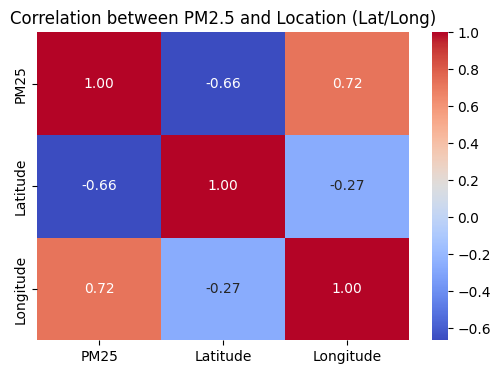

In [ ]:
df_city = df.groupby("City").median(numeric_only=True).reset_index()
corr = df_city[['PM25','Latitude','Longitude']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between PM2.5 and Location (Lat/Long)")
plt.show()



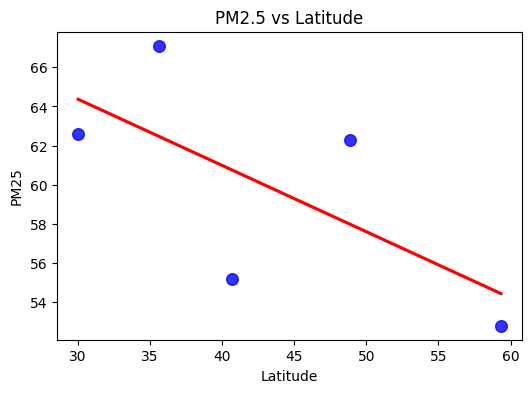

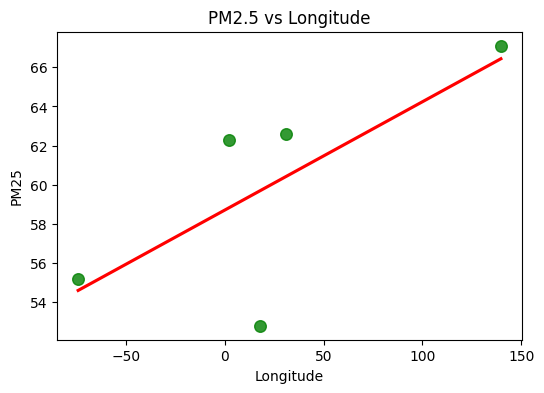

In [ ]:
plt.figure(figsize=(6,4))
sns.regplot(x="Latitude", y="PM25", data=df, ci=None, scatter_kws={"s":70, "color":"blue"}, line_kws={"color":"red"})
plt.title("PM2.5 vs Latitude")
plt.show()

# -------- Scatter with Regression: PM2.5 vs Longitude --------
plt.figure(figsize=(6,4))
sns.regplot(x="Longitude", y="PM25", data=df, ci=None, scatter_kws={"s":70, "color":"green"}, line_kws={"color":"red"})
plt.title("PM2.5 vs Longitude")
plt.show()

In [ ]:
!pip install "dash[dash-table]" plotly scikit-learn pandas


In [2]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.6 MB/s eta 0:00:00


In [9]:
import dash
from dash import dcc, html, Input, Output, dash_table
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ==========================
# Load data
# ==========================
file_path = "waqi_city_pm25_100rows.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])

# Initialize Dash app
app = dash.Dash(__name__)

# ==========================
# Layout
# ==========================
app.layout = html.Div([
    html.H1("PM2.5 Dashboard", style={"textAlign": "center"}),

    # Filters
    html.Div([
        html.Label("Select Country:"),
        dcc.Dropdown(
            id="country_filter",
            options=[{"label": c, "value": c} for c in df["Country"].unique()],
            value=None,
            placeholder="All Countries"
        ),

        html.Label("Select City:"),
        dcc.Dropdown(
            id="city_filter",
            options=[{"label": c, "value": c} for c in df["City"].unique()],
            value=None,
            placeholder="All Cities"
        ),

        html.Label("Select Date Range:"),
        dcc.DatePickerRange(
            id="date_filter",
            start_date=df['Date'].min(),
            end_date=df['Date'].max(),
            display_format='YYYY-MM-DD'
        ),

        html.Br(),
        html.Button("Download Filtered Data (CSV)", id="btn_download"),
        dcc.Download(id="download_data")
    ], style={"width": "70%", "margin": "auto"}),

    html.Hr(),

    # Plots
    html.Div([dcc.Graph(id="hist_plot")]),
    html.Div([dcc.Graph(id="box_plot")]),
    html.Div([dcc.Graph(id="line_plot")]),
    html.Div([dcc.Graph(id="map_plot")]),
    html.Div([dcc.Graph(id="heatmap_plot")]),
    html.Div([dcc.Graph(id="cluster_plot")]),
    html.Div([dcc.Graph(id="trend_plot")]),

    # Pivot Table + Bar
    html.Div([
        html.H3("Pivot Table: Avg PM2.5 by Country & City"),
        dash_table.DataTable(
            id="pivot_table",
            columns=[{"name": i, "id": i} for i in ["Country", "City", "Avg_PM25"]],
            data=[]
        )
    ]),
    html.Div([dcc.Graph(id="bar_plot")])
])

# ==========================
# Callbacks
# ==========================
@app.callback(
    [Output("hist_plot", "figure"),
     Output("box_plot", "figure"),
     Output("line_plot", "figure"),
     Output("map_plot", "figure"),
     Output("city_filter", "options"),
     Output("download_data", "data"),
     Output("pivot_table", "data"),
     Output("bar_plot", "figure"),
     Output("heatmap_plot", "figure"),
     Output("cluster_plot", "figure"),
     Output("trend_plot", "figure")],
    [Input("country_filter", "value"),
     Input("city_filter", "value"),
     Input("date_filter", "start_date"),
     Input("date_filter", "end_date"),
     Input("btn_download", "n_clicks")]
)
def update_graphs(selected_country, selected_city, start_date, end_date, n_clicks):
    dff = df.copy()

    # Filters
    if selected_country:
        dff = dff[dff["Country"] == selected_country]
    city_options = [{"label": c, "value": c} for c in dff["City"].unique()]
    if selected_city:
        dff = dff[dff["City"] == selected_city]
    if start_date and end_date:
        dff = dff[(dff['Date'] >= start_date) & (dff['Date'] <= end_date)]

    # Histogram
    fig_hist = px.histogram(dff, x="Median_PM25", nbins=20, title="Distribution of PM2.5", marginal="box")

    # Boxplot
    fig_box = px.box(dff, x="Country", y="Median_PM25", title="PM2.5 Levels by Country")

    # Line chart
    fig_line = px.line(
        dff.groupby("Date", as_index=False)["Median_PM25"].mean(),
        x="Date", y="Median_PM25", title="Average PM2.5 Over Time"
    )

    # Scatter Map
    fig_map = px.scatter_geo(
        dff, lat="Lat", lon="Long", size="Median_PM25", color="Country",
        hover_name="City", projection="natural earth", title="PM2.5 Levels on Map"
    )

    # Pivot Table
    pivot_df = dff.groupby(["Country", "City"], as_index=False)["Median_PM25"].mean()
    pivot_df.rename(columns={"Median_PM25": "Avg_PM25"}, inplace=True)
    pivot_data = pivot_df.to_dict("records")

    # Bar (Top 10 cities)
    bar_df = pivot_df.sort_values("Avg_PM25", ascending=False).head(10)
    fig_bar = px.bar(bar_df, x="City", y="Avg_PM25", color="Country", title="Top 10 Cities by Avg PM2.5")

    # Heatmap
    fig_heatmap = px.density_mapbox(
        dff, lat="Lat", lon="Long", z="Median_PM25", radius=20,
        center=dict(lat=20, lon=0), zoom=1,
        mapbox_style="open-street-map",
        title="Heatmap of PM2.5 Levels"
    )

    # Clustering
    cluster_fig = px.scatter()
    if not dff.empty:
        try:
            features = dff[["Median_PM25", "Lat", "Long"]]
            scaler = StandardScaler()
            scaled_features = scaler.fit_transform(features)
            kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
            dff["Cluster"] = kmeans.fit_predict(scaled_features)

            cluster_fig = px.scatter_geo(
                dff, lat="Lat", lon="Long", color="Cluster",
                hover_name="City", size="Median_PM25",
                projection="natural earth",
                title="City Clustering based on PM2.5 and Location"
            )
        except Exception as e:
            print("Clustering skipped:", e)

    # Trend Analysis (if Year column exists)
    trend_fig = px.scatter()
    if "Year" in dff.columns:
        trend_df = dff.groupby(["Year", "Country"])["Median_PM25"].mean().reset_index()
        trend_fig = px.line(
            trend_df, x="Year", y="Median_PM25", color="Country",
            title="Trend of PM2.5 Levels Over Time by Country", markers=True
        )

    # Download
    download_data = None
    if n_clicks:
        download_data = dff.to_csv(index=False)

    return fig_hist, fig_box, fig_line, fig_map, city_options, download_data, pivot_data, fig_bar, fig_heatmap, cluster_fig, trend_fig

# ==========================
# Run App
# ==========================
if __name__ == "__main__":
    app.run(debug=True, host="127.0.0.1", port=8050)


<IPython.core.display.Javascript object>